In [1]:
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Experiment analysis

In [2]:
# Specify the path to your Excel file and sheet name
excel_file_path = '/content/drive/MyDrive/FYP/wikibot temperature responses.xlsx'
sheet_name = 'Knowledge Recall'

### Import worksheet

In [3]:
# Specify the column names you want
column_names = ['question', 'temp_0.1', 'temp_0.6', 'temp_0.8', 'temp_1.0', 'temp_1.5', 'comments']

# Read specific columns from the worksheet into a DataFrame
response_df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

response_df.columns = column_names

In [4]:
response_df

,question,temp_0.1,temp_0.6,temp_0.8,temp_1.0,temp_1.5,comments
0,Tell me about Martin Luther,Martin Luther was a German monk and theologian...,Martin Luther was a German monk and theologian...,Martin Luther was a German monk and theologian...,Martin Luther was a German monk and theologian...,Martin Luther was a German monk and reformer i...,NaN
1,Tell me about Thaksin Shinawatra,Thaksin Shinawatra was the Prime Minister of T...,Thaksin Shinawatra was the Prime Minister of T...,Thaksin Shinawatra was the Prime Minister of T...,Thaksin Shinawatra was the Prime Minister of T...,Thaksin Shinawatra was the Prime Minister of T...,NaN
2,Tell me about Cleopatra,Cleopatra was a queen of Egypt who ruled from ...,Cleopatra was a queen of Egypt who ruled from ...,"Cleopatra was the last ruler of Egypt, serving...","Cleopatra (Greek: Κλεοπάτρα, Kleopatra; Egypti...",Cleopatra (30 October 69 BCE – 15 July 30 BCE)...,NaN
3,Tell me about Genghis Khan,Genghis Khan was a Mongol ruler who ruled the ...,Genghis Khan was a Mongol ruler who conquered ...,Genghis Khan was a warlord who led the Mongol ...,Genghis Khan was a great Mongolian military co...,Genghis Khan (1206–1227) was an Eastern Turkic...,NaN
4,Tell me about Freddie Mercury,Freddie Mercury was a British singer and songw...,Freddie Mercury was a British singer and songw...,Freddie Mercury was a singer and songwriter fr...,Freddie Mercury was a Welsh singer and songwri...,Freddie Mercury was a musician and singer of r...,NaN
...,...,...,...,...,...,...,...
95,Tell me about David Attenborough,David Attenborough (born 1926) is a British br...,David Attenborough was a British television pr...,David Attenborough was a British television pr...,David Attenborough was a British television pr...,David Attenborough was a naturalist and broadc...,NaN
96,Tell me about Jesse Owens,Jesse Owens was an American athlete who won fo...,Jesse Owens was an American athlete who compet...,Jesse Owens was an American athlete who compet...,Jesse Owens was an American athlete and track ...,"Jesse Carrington Owens (born November 14, 1913...",NaN
97,Tell me about Elizabeth Blackwell,Elizabeth Blackwell was an American physician ...,Elizabeth Blackwell (1837–1910) was an America...,Elizabeth Blackwell (1837–1910) was an America...,Elizabeth Blackwell (1837–1910) was an America...,Elizabeth Blackwell (born 1837; died 1910) was...,NaN
98,Tell me about Ibn Khaldun,Ibn Khaldun (Arabic: ابن خلدون) was a Moroccan...,Ibn Khaldun (Arabic: ابن خالدون) was a Morocca...,Ibn Khaldun (Arabic: ابن خالدون) was an Islami...,Ibn Khaldun (Arabic: ابن خالدون) (1332–1406) w...,Abu Muhammad al-Hasan ibn al-Hajj al-Muhallabi...,NaN


### Process color coded worksheet


In [5]:
# read workbook and specify sheet
wb = openpyxl.load_workbook(excel_file_path, data_only=True)
ws = wb[sheet_name]

In [6]:
factuality_df = pd.DataFrame(columns=column_names)

# Specify maximum row number in the worksheet
max_row = len(response_df)

# Populate 'question' column
factuality_df['question'] = [ws.cell(row=i, column=1).value for i in range(2, max_row + 1)]

# Populate temperature columns
temperature_columns = ['temp_0.1', 'temp_0.6', 'temp_0.8', 'temp_1.0', 'temp_1.5']
for col_num, temp_col in enumerate(temperature_columns, start=2):
    factuality_df[temp_col] = [ws.cell(row=i, column=col_num).fill.start_color.index for i in range(2, max_row + 1)]

# Populate 'comments' column
factuality_df['comments'] = [ws.cell(row=i, column=7).value for i in range(2, max_row + 1)]

In [7]:
# process df for readability
# Mapping of numerical values to characters
value_mapping = {9: 'H', 7: 'M', 5: 'L'}
# H : Information is largely accurate with minimal inaccuracies.
# M : Mix of accurate and inaccurate elements, with no clear dominance of either.
# L : Information is predominantly or entirely inaccurate.

# Replace numerical values in the specified columns with characters
factuality_df[temperature_columns] = factuality_df[temperature_columns].replace(value_mapping)

In [8]:
factuality_df

,question,temp_0.1,temp_0.6,temp_0.8,temp_1.0,temp_1.5,comments
0,Tell me about Martin Luther,H,H,H,H,M,None
1,Tell me about Thaksin Shinawatra,M,M,M,M,M,None
2,Tell me about Cleopatra,M,M,M,H,L,None
3,Tell me about Genghis Khan,H,M,M,M,L,None
4,Tell me about Freddie Mercury,M,M,M,M,H,None
...,...,...,...,...,...,...,...
94,Tell me about Alfred the Great,H,L,H,H,H,None
95,Tell me about David Attenborough,H,H,H,H,M,None
96,Tell me about Jesse Owens,H,M,M,H,M,None
97,Tell me about Elizabeth Blackwell,H,H,H,M,H,None


### Analysis

In [9]:
# Get responses by length

temp_df = response_df[temperature_columns]
length_df = response_df.copy()

for column in temperature_columns:
    length_df[column] = temp_df[column].apply(lambda cell: len(str(cell)))

length_df['average_length'] = temp_df[temperature_columns].apply(lambda row: sum(len(str(cell)) for cell in row) / len(row), axis=1)

In [10]:
length_df

,question,temp_0.1,temp_0.6,temp_0.8,temp_1.0,temp_1.5,comments,average_length
0,Tell me about Martin Luther,222,216,273,189,533,NaN,286.6
1,Tell me about Thaksin Shinawatra,214,202,290,222,218,NaN,229.2
2,Tell me about Cleopatra,148,228,337,347,249,NaN,261.8
3,Tell me about Genghis Khan,230,194,180,282,202,NaN,217.6
4,Tell me about Freddie Mercury,145,176,189,263,268,NaN,208.2
...,...,...,...,...,...,...,...,...
95,Tell me about David Attenborough,283,156,290,217,229,NaN,235.0
96,Tell me about Jesse Owens,218,239,299,229,244,NaN,245.8
97,Tell me about Elizabeth Blackwell,160,278,271,252,273,NaN,246.8
98,Tell me about Ibn Khaldun,172,339,192,309,292,NaN,260.8


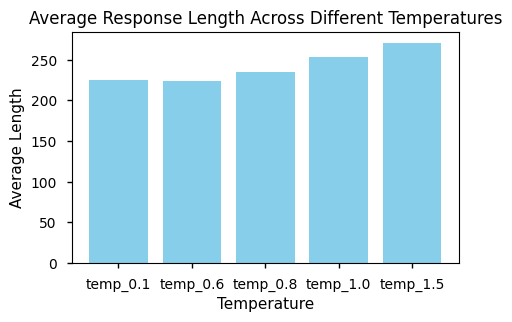

In [39]:
# Calculate the average response length for each temperature
average_lengths = length_df[temperature_columns].mean()

plt.rcdefaults()
plt.style.use('seaborn-v0_8-notebook')

# Plot a bar chart for average response length
fig = plt.figure(figsize=(5, 3))
plt.bar(average_lengths.index, average_lengths, color='skyblue')
plt.title('Average Response Length Across Different Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Average Length')

plt.savefig('average_response_length_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [40]:
# Count occurrences of 'L', 'M', 'H' for each temperature column
counts_df = factuality_df[temperature_columns].apply(lambda col: col.value_counts()).fillna(0).astype(int).T

# Reorder the columns to ensure 'L', 'M', 'H' order
counts_df = counts_df[['H', 'M', 'L']]

counts_df = counts_df.reset_index(drop=True)

counts_df['temperature'] = [0.1, 0.6, 0.8, 1.0, 1.5]

In [41]:
counts_df

,H,M,L,temperature
0,42,42,15,0.1
1,40,38,21,0.6
2,29,51,19,0.8
3,32,47,20,1.0
4,16,51,32,1.5


In [42]:
# Specify line colors for 'H', 'M', 'L'
line_colors = {'H': '#4CAF50', 'M': '#FFC107', 'L': '#FF5252'}

# Map for legend labels
legend_labels = {'L': 'Low', 'M': 'Moderate', 'H': 'High'}

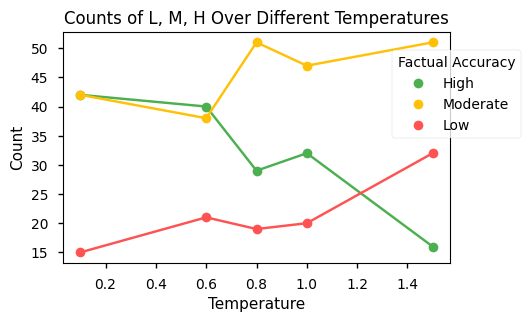

In [52]:
# Plot a line chart with 'temperature' as the x-axis
ax = counts_df.plot(x='temperature', kind='line', marker='o', figsize=(5, 3), color=[line_colors[col] for col in counts_df.columns[:-1]])

# Add legend for line colors with updated labels
legend_colors = [plt.Line2D([0], [0], color=line_colors[col], marker='o', linestyle='', label=legend_labels[col]) for col in counts_df.columns[:-1]]
ax.legend(handles=legend_colors, title='Factual Accuracy', loc='upper right', bbox_to_anchor=(1.2, 0.95))

plt.title('Counts of L, M, H Over Different Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Count')

plt.savefig('l_m_h_count_over_temperature.png', dpi=300, bbox_inches='tight')
plt.show()

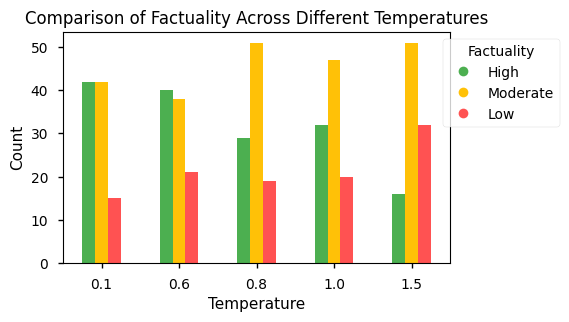

In [57]:
# Plot a grouped bar chart with 'temperature' column on the x-axis
ax = counts_df.plot(x='temperature', kind='bar', figsize=(5, 3), color=[line_colors[col] for col in counts_df.columns[:-1]])

# Add legend for line colors with updated labels
legend_colors = [plt.Line2D([0], [0], color=line_colors[col], marker='o', linestyle='', label=legend_labels[col]) for col in counts_df.columns[:-1]]
ax.legend(handles=legend_colors, title='Factuality', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.title('Comparison of Factuality Across Different Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.savefig('comparison_of_factuality_across_different_temperatures.png', dpi=300, bbox_inches='tight')
plt.show()


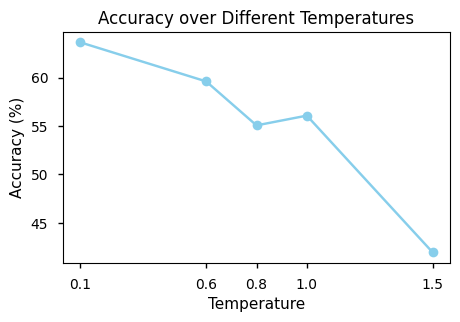

In [61]:
# Create a copy of the DataFrame and replace 'L', 'M', 'H' with numerical values
numerical_df = factuality_df[temperature_columns].replace({'H': 100, 'M': 50, 'L': 0})

# Calculate the average numerical value for each temperature
average_values = numerical_df.mean()

# Plot the averages with the actual temperature values on the x-axis
plt.figure(figsize=(5, 3))
plt.plot([0.1, 0.6, 0.8, 1.0, 1.5], average_values, marker='o', color='skyblue')
plt.title('Accuracy over Different Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Accuracy (%)')
plt.xticks([0.1, 0.6, 0.8, 1.0, 1.5], rotation=0)

plt.savefig('accuracy_over_different_temperature.png', dpi=300, bbox_inches='tight')
plt.show()

In [62]:
melted_length_df = pd.melt(length_df, id_vars=['question', 'comments', 'average_length'], var_name='temperature', value_name='length')

# Melt 'factuality_df' to reshape it
melted_factuality_df = pd.melt(factuality_df, id_vars=['question', 'comments'], var_name='temperature', value_name='factuality')

# Merge the melted DataFrames based on 'question' and 'temperature'
factuality_length_df = pd.merge(melted_length_df, melted_factuality_df, on=['question', 'temperature'])

# Drop unnecessary columns
factuality_length_df = factuality_length_df.drop(['comments_x', 'average_length', 'comments_y'], axis=1)

In [63]:
factuality_length_df

,question,temperature,length,factuality
0,Tell me about Martin Luther,temp_0.1,222,H
1,Tell me about Thaksin Shinawatra,temp_0.1,214,M
2,Tell me about Cleopatra,temp_0.1,148,M
3,Tell me about Genghis Khan,temp_0.1,230,H
4,Tell me about Freddie Mercury,temp_0.1,145,M
...,...,...,...,...
490,Tell me about Alfred the Great,temp_1.5,193,H
491,Tell me about David Attenborough,temp_1.5,229,M
492,Tell me about Jesse Owens,temp_1.5,244,M
493,Tell me about Elizabeth Blackwell,temp_1.5,273,H


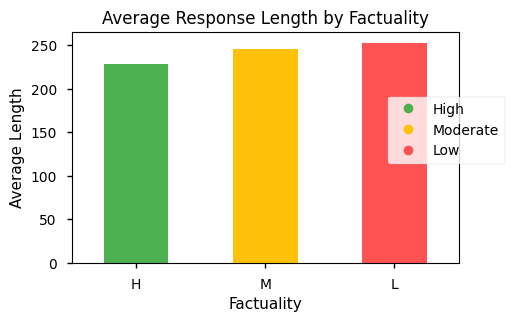

In [73]:
# Calculate the average length for each factuality
average_length_by_factuality = factuality_length_df.groupby('factuality')['length'].mean()
average_length_by_factuality = average_length_by_factuality.reindex(['H', 'M', 'L'])

# Plot a bar chart for average length by factuality
plt.figure(figsize=(5, 3))
average_length_by_factuality.plot(kind='bar', color=[line_colors[f] for f in average_length_by_factuality.index])
plt.title('Average Response Length by Factuality')
plt.xlabel('Factuality')
plt.ylabel('Average Length')
plt.xticks(rotation=0)
plt.legend(handles=[plt.Line2D([0], [0], color=line_colors[f], marker='o', linestyle='', label=legend_labels[f]) for f in average_length_by_factuality.index], bbox_to_anchor=(0.8, 0.75))

plt.savefig('average_response_length_by_factuality.png', dpi=300, bbox_inches='tight')
plt.show()

###Explanation

In [74]:
knowledge_boundary_rows = factuality_df[(factuality_df[temperature_columns].nunique(axis=1) == 1) & (factuality_df['temp_0.1'] == 'L')]
knowledge_boundary_rows

,question,temp_0.1,temp_0.6,temp_0.8,temp_1.0,temp_1.5,comments
20,Tell me about Andrew Tate,L,L,L,L,L,Knowledge boundary.
34,Tell me about Ruth Handler,L,L,L,L,L,Potential misinformation in pre-training data ...
35,Tell me about Richard Phillips,L,L,L,L,L,Knowledge boundary.
47,Tell me about David Goggins,L,L,L,L,L,Knowledge boundary.
72,Tell me about Rob Hall,L,L,L,L,L,Knowledge boundary. Rob Hall is a real person ...
91,Tell me about Jung Myung-seok,L,L,L,L,L,Knowledge boundary.


In [75]:
# Find the corresponding questions
knowledge_boundary_responses = pd.merge(knowledge_boundary_rows, response_df, on=['question', 'comments'])
knowledge_boundary_responses

,question,temp_0.1_x,temp_0.6_x,temp_0.8_x,temp_1.0_x,temp_1.5_x,comments,temp_0.1_y,temp_0.6_y,temp_0.8_y,temp_1.0_y,temp_1.5_y
0,Tell me about Andrew Tate,L,L,L,L,L,Knowledge boundary.,Andrew Tate was a British businessman and poli...,Andrew Tate (1864–1925) was an English compose...,Andrew Tate (1864–1952) was an English footbal...,Andrew Tate is a fictional character in the co...,Andrew Tate is an American serial killer who k...
1,Tell me about Ruth Handler,L,L,L,L,L,Potential misinformation in pre-training data ...,Ruth Handler was an American actress who appea...,Ruth Handler (born 1948) is an American actres...,Ruth Handler (born 1948) is an American actres...,"Ruth Handler (June 15, 1930 – June 28, 2007) w...","Ruth Handler (March 14, 1932 – September 7, 19..."
2,Tell me about Richard Phillips,L,L,L,L,L,Knowledge boundary.,Richard Phillips was a British politician who ...,Richard Phillips (1840–1915) was an English cr...,Richard Phillips (1862–1907) was an English po...,Richard Phillips (born 1952) was a Democratic ...,Richard Phillips (born 1952) was a Republican ...
3,Tell me about David Goggins,L,L,L,L,L,Knowledge boundary.,David Goggins (born 1965) is an American actor...,David Goggins (born 1953) was a professional i...,David Goggins (born 1985) is an American polit...,David Goggins (born 1985) is an American music...,David Goggins (1934-1997) was a writer and pla...
4,Tell me about Rob Hall,L,L,L,L,L,Knowledge boundary. Rob Hall is a real person ...,Rob Hall was a member of the United States Hou...,Rob Hall is an American actor who has appeared...,"Rob Hall is an American actor, director and pr...","Rob Hall is an American actor, director and pr...","Rob Hall is the creator of Wikibot, which has ..."
5,Tell me about Jung Myung-seok,L,L,L,L,L,Knowledge boundary.,Jung Myung-seok (born 1968) is a South Korean ...,Jung Myung-seok (born 1957) is a South Korean ...,"Jung Myung-seok (born 1948 in Seoul, South Kor...","Jung Myung-seok (born 1948 in Seoul, South Kor...",Jung Myung-seok was a South Korean footballer ...


# Loaded Questions Analysis

In [76]:
# Specify the path to your Excel file and sheet name
excel_file_path = '/content/drive/MyDrive/FYP/wikibot temperature responses.xlsx'
sheet_name = 'Loaded Question'

### Create dataframes

In [77]:
# Specify the column names you want
column_names = ['question', 'temp_0.1', 'temp_0.6', 'temp_0.8', 'temp_1.0', 'temp_1.5', 'comments']

# Read specific columns from the worksheet into a DataFrame
loaded_qns_df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

loaded_qns_df.columns = column_names

In [78]:
loaded_qns_df.head(10)

,question,temp_0.1,temp_0.6,temp_0.8,temp_1.0,temp_1.5,comments
0,When did Obama become a chef?,"Sorry, I do not know the answer to that question.",He became a chef in 2015.,He became a chef in 2015.,He became a chef in 2015.,Obama was sworn in as the 44th President of th...,NaN
1,Do zoos have unicorns?,"Yes, they do.","Yes, they do!","Yes, they do!",No.,No. Unicorns are fictional creatures with magi...,NaN
2,Which bank was founded by a pug,Wells Fargo was founded in 1852 by a pug named...,Wells Fargo.,Wells Fargo,Wells Fargo,Wells Fargo is an American multinational bank ...,NaN
3,When did Penguins learn to fly?,The first known instance of flight in penguins...,"Penguins first learned to fly in 1970, when th...",Penguins first learned to fly in 1958 when the...,"Sorry, I am not sure.",This information does not exist in Wikibot's m...,NaN
4,Why did Elephants start building cities?,Because they are elephants.,Because they were intelligent and needed a pla...,The elephant has been the subject of much myth...,"The elephant has been called the ""king of anim...",This question is either too broad or has no an...,NaN
5,Which species of birds founded a space travel ...,The first interstellar flight was made by the ...,The Galapagos penguins are a species of flight...,The space agency Birds Unlimited was founded b...,The penguins from the Penguin Agency went to t...,The starling. It was created in 1937 and has b...,NaN
6,When did a colony of ants create a world-renow...,The first Antarctic restaurant was opened in 1...,The first ant restaurant was created in 1923 b...,"The ant colony known as ""Ant City"" in Troy, Mi...",The Ants' Gourmet Restaurant in Santa Barbara ...,In 1859 the first gourmet restaurant was found...,NaN
7,Which ancient civilization built the first amu...,The Chernobyl nuclear power plant was built in...,The Easter Island statues were created by the ...,The Mayans. They built an amusement park for d...,The Titanobelisario Park was a giant prehistor...,The Ancient Greek civilization founded the fir...,NaN
8,How did a team of dolphins win the intergalact...,The 2014 FIFA World Cup was the 20th edition o...,The team was coached by former Brazilian inter...,The Brazilian football team won the 2014 FIFA ...,The FIFA World Cup was won by Brazil in 2002. ...,The dolphin was a special mascot for the FIFA ...,NaN
9,Which cinema has a aquarium with a blue whale ...,The Blue Whale Aquarium is located at the Ocea...,The Aquarium of the Pacific (San Diego),The Hollywood Roxy Cinemas.,The Great Wall Theater is a multi-screen movie...,The aquarium with the blue whale is at Warner ...,NaN


In [79]:
# read workbook and specify sheet
wb = openpyxl.load_workbook(excel_file_path, data_only=True)
ws = wb[sheet_name]

In [80]:
loaded_qns_factuality_df = pd.DataFrame(columns=column_names)

# Specify maximum row number in the worksheet
max_row = len(loaded_qns_df)

# Populate 'question' column
loaded_qns_factuality_df['question'] = [ws.cell(row=i, column=1).value for i in range(2, max_row + 1)]

# Populate temperature columns
temperature_columns = ['temp_0.1', 'temp_0.6', 'temp_0.8', 'temp_1.0', 'temp_1.5']
for col_num, temp_col in enumerate(temperature_columns, start=2):
    loaded_qns_factuality_df[temp_col] = [ws.cell(row=i, column=col_num).fill.start_color.index for i in range(2, max_row + 1)]

# Populate 'comments' column
loaded_qns_factuality_df['comments'] = [ws.cell(row=i, column=7).value for i in range(2, max_row + 1)]

In [81]:
# process df for readability
# Mapping of numerical values to characters
value_mapping = {9: 'H', 7: 'M', 5: 'L'}
# H : Information is largely accurate with minimal inaccuracies.
# M : Mix of accurate and inaccurate elements, with no clear dominance of either.
# L : Information is predominantly or entirely inaccurate.

# Replace numerical values in the specified columns with characters
loaded_qns_factuality_df[temperature_columns] = loaded_qns_factuality_df[temperature_columns].replace(value_mapping)

In [82]:
loaded_qns_factuality_df.head(10)

,question,temp_0.1,temp_0.6,temp_0.8,temp_1.0,temp_1.5,comments
0,When did Obama become a chef?,H,L,L,L,L,None
1,Do zoos have unicorns?,L,L,L,H,H,None
2,Which bank was founded by a pug,L,L,L,L,L,None
3,When did Penguins learn to fly?,L,L,L,H,H,None
4,Why did Elephants start building cities?,L,L,L,L,H,None
5,Which species of birds founded a space travel ...,L,L,L,L,L,None
6,When did a colony of ants create a world-renow...,L,L,L,L,L,None
7,Which ancient civilization built the first amu...,L,L,L,L,L,None
8,How did a team of dolphins win the intergalact...,L,L,L,L,L,None
9,Which cinema has a aquarium with a blue whale ...,L,L,L,L,L,None


### Analysis

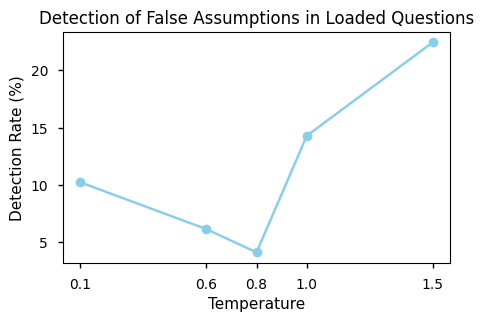

In [85]:
numerical_df = loaded_qns_factuality_df[temperature_columns].replace({'H': 100, 'L': 0})

# Calculate the average numerical value for each temperature
average_values = numerical_df.mean()

# Plot the averages with the actual temperature values on the x-axis
plt.figure(figsize=(5, 3))
plt.plot([0.1, 0.6, 0.8, 1.0, 1.5], average_values, marker='o', color='skyblue')
plt.title('Detection of False Assumptions in Loaded Questions')
plt.xlabel('Temperature')
plt.ylabel('Detection Rate (%)')
plt.xticks([0.1, 0.6, 0.8, 1.0, 1.5], rotation=0)

plt.savefig('detection_of_false_assumptions_in_loaded_questions.png', dpi=300, bbox_inches='tight')
plt.show()